In [30]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet(path = 'C:/Users/Asus/Documents/VIU_Notebooks/TFM/Estandarizada/data_total', engine = 'auto')

In [3]:
df = df.drop(columns=['PROVINCIA_ISO','HORA_TEMP_MIN', 'HORA_TEMP_MAX', 'HORA_RACHA', 'HORA_PRES_MAX', 'HORA_PRES_MIN', 'NUM_HOSP', 'NUM_UCI', 'NUM_DEFU', 'GRUPO_EDAD', 'SEXO'])

In [4]:
df

,FECHA,NUM_CASOS,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,TEMP_MAX,DIR,VEL_MEDIA,RACHA,PRES_MAX,PRES_MIN,SOL
0,2020-01-01,0,ALICANTE,81,10.3,0.0,4.3,16.3,20.0,1.1,5.0,1023.6,1020.9,8.8
1,2020-01-01,0,ALICANTE,81,10.3,0.0,4.3,16.3,20.0,1.1,5.0,1023.6,1020.9,8.8
2,2020-01-01,0,ALICANTE,81,10.3,0.0,4.3,16.3,20.0,1.1,5.0,1023.6,1020.9,8.8
3,2020-01-01,0,ALICANTE,81,10.3,0.0,4.3,16.3,20.0,1.1,5.0,1023.6,1020.9,8.8
4,2020-01-01,0,ALICANTE,81,10.3,0.0,4.3,16.3,20.0,1.1,5.0,1023.6,1020.9,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458283,2023-02-28,3,ZAMORA,715,0.6,0.0,-5.5,6.8,3.0,1.9,10.0,940.4,937.7,5.4
1458284,2023-02-28,5,ZAMORA,715,0.6,0.0,-5.5,6.8,3.0,1.9,10.0,940.4,937.7,5.4
1458285,2023-02-28,0,ZAMORA,715,0.6,0.0,-5.5,6.8,3.0,1.9,10.0,940.4,937.7,5.4
1458286,2023-02-28,0,ZAMORA,715,0.6,0.0,-5.5,6.8,3.0,1.9,10.0,940.4,937.7,5.4


In [5]:
#df['MONTH'] = pd.DatetimeIndex(df['FECHA']).month
#df['WEEK'] = df['FECHA'].dt.isocalendar().week.astype(int)
df['FECHA'] = pd.to_datetime(df.FECHA).dt.to_period('m')

In [6]:
fec_start = df.loc[df["FECHA"].idxmin()]["FECHA"]
print(fec_start)

2020-01


In [7]:
fec_end = df.loc[df["FECHA"].idxmax()]["FECHA"]
print(fec_end)

2023-02


In [8]:
from operator import attrgetter
diff = fec_end - fec_start
print(diff)

<37 * MonthEnds>


In [9]:
df = df.groupby(['FECHA', 'PROVINCIA']).agg(
    {'NUM_CASOS':'sum', 'ALTITUD': 'mean', 'TEMP_MED': 'mean', 
     'PREC': 'mean', 'TEMP_MIN': 'mean', 'TEMP_MAX': 'mean', 'DIR': 'mean', 'VEL_MEDIA': 'mean', 'RACHA': 'mean', 
     'PRES_MAX': 'mean', 'PRES_MIN': 'mean', 'SOL': 'mean'}).reset_index()

In [10]:
df_ten = df[["FECHA", "NUM_CASOS"]]

In [11]:
df_ten = df_ten.groupby(['FECHA']).agg({'NUM_CASOS':'sum'}).reset_index()

NameError: name 'plt' is not defined

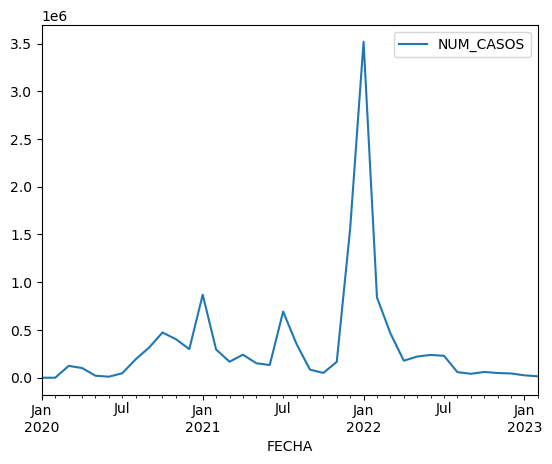

In [12]:
df_ten.plot(x="FECHA", y="NUM_CASOS", kind="line")
plt.show()

In [13]:
df.shape

(1976, 14)

In [14]:
df

,FECHA,PROVINCIA,NUM_CASOS,ALTITUD,TEMP_MED,PREC,TEMP_MIN,TEMP_MAX,DIR,VEL_MEDIA,RACHA,PRES_MAX,PRES_MIN,SOL
0,2020-01,A CORUÑA,1,58.0,11.519355,3.848387,8.900000,14.132258,23.580645,3.706452,12.183871,1019.816129,1013.903226,3.838710
1,2020-01,ALBACETE,0,674.0,6.996774,1.354839,1.493548,12.483871,32.483871,0.916129,6.451613,949.235484,945.961290,5.474194
2,2020-01,ALICANTE,0,81.0,11.664516,1.193548,6.183871,17.145161,22.000000,1.767742,7.741935,1017.296774,1013.180645,6.896774
3,2020-01,ALMERIA,0,21.0,12.487097,0.690323,8.206452,16.758065,53.967742,3.425806,9.629032,1024.670968,1020.690323,6.409677
4,2020-01,ARABA/ALAVA,0,513.0,5.445161,0.948387,0.990323,9.912903,54.516129,3.229032,10.045161,967.941935,963.483871,3.254839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,2023-02,TOLEDO,286,690.0,5.757143,0.028571,-1.303571,12.803571,19.892857,3.935714,11.978571,944.539286,940.478571,7.700000
1972,2023-02,VALENCIA,630,56.0,9.582143,1.014286,3.578571,15.575000,59.678571,2.817857,8.164286,1019.975000,1015.625000,6.250000
1973,2023-02,VALLADOLID,407,846.0,4.242857,0.267857,-2.357143,10.853571,13.107143,3.760714,9.750000,928.325000,924.460714,7.260714
1974,2023-02,ZAMORA,307,715.0,5.128571,0.335714,-1.796429,12.064286,20.071429,1.757143,8.932143,943.646429,939.407143,6.792857


# Población por provincia

In [15]:
# Se utiliza la geometrica 
df_pob = pd.read_csv("pobla_prov.csv", encoding="latin", keep_default_na=False, na_values="", sep=';')
df_pob = df_pob.drop(columns=['Sexo','Edad (año a año)', 'Españoles/Extranjeros'])
df_pob["Provincias"] = df_pob["Provincias"].str.slice(start=3)
df_pob = df_pob[df_pob["Año"] >= 2013]
df_pob["Total"] = df_pob["Total"].str.replace(".","").astype(int)
df_pob = df_pob.assign(FEC_POB_INI = lambda x: (x['Año'] + 1))
df_pob["Provincias"] = df_pob["Provincias"].str.upper()
df_pob["Provincias"] = df_pob["Provincias"].str.strip()
df_pob.columns = ["PROVINCIA", "YEAR_ACUM", "TOTAL_POB", "YEAR"]
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['ALMERÍA'], 'ALMERIA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['ARABA/ÁLAVA'], 'ARABA/ALAVA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['ALICANTE/ALACANT'], 'ALICANTE')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['ÁVILA'], 'AVILA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['BALEARS, ILLES'], 'ILLES BALEARS')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['CÁCERES'], 'CACERES')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['CÁDIZ'], 'CADIZ')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['CASTELLÓN/CASTELLÓ'], 'CASTELLON')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['CÓRDOBA'], 'CORDOBA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['CORUÑA, A'], 'A CORUÑA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['JAÉN'], 'JAEN')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['LEÓN'], 'LEON')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['MÁLAGA'], 'MALAGA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['PALMAS, LAS'], 'LAS PALMAS')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['RIOJA, LA'], 'LA RIOJA')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['SANTA CRUZ DE TENERIFE'], 'STA. CRUZ DE TENERIFE')
df_pob['PROVINCIA'] = df_pob['PROVINCIA'].replace(['VALENCIA/VALÈNCIA'], 'VALENCIA')

d = {}
num_year = 2022 - 2019
prov = list(df_pob['PROVINCIA'].unique())
for i in prov:
    poblacion_inicial = df_pob[(df_pob["PROVINCIA"] == i) & (df_pob["YEAR_ACUM"] == 2019)]["TOTAL_POB"].values[0]
    poblacion_final = df_pob[(df_pob["PROVINCIA"] == i) & (df_pob["YEAR_ACUM"] == 2022)]["TOTAL_POB"].values[0]
    tasa_crecimiento_anual = ((poblacion_final / poblacion_inicial) ** (1 / num_year) - 1)
    tasa_crecimiento_mensual = (1 + tasa_crecimiento_anual) ** (1 / 12) - 1
    d[i] = tasa_crecimiento_mensual
    
tasa_prov = pd.DataFrame([d]).transpose()
tasa_prov.reset_index(inplace = True)
tasa_prov.rename(columns={0:"TASA_MENSUAL", "index": "PROVINCIA"}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_15484\3328156847.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_pob["Total"] = df_pob["Total"].str.replace(".","").astype(int)


In [16]:
df_prov_fec = df[["PROVINCIA", "FECHA"]]
df_prov_fec = df_prov_fec.drop_duplicates().sort_values(by=['PROVINCIA', 'FECHA'])
df_prov_fec = df_prov_fec.assign(YEAR = lambda x: (x['FECHA'].astype(str).str.slice(stop=4).astype(int)))
DF_PROV = df_prov_fec.merge(df_pob, how='left', on=['PROVINCIA', 'YEAR'])
DF_PROV = DF_PROV.merge(tasa_prov, how='inner', on=['PROVINCIA'])
DF_PROV = DF_PROV.assign(POB_MEN = lambda x: (
    round(x["TOTAL_POB"] * (1 + x["TASA_MENSUAL"]) ** (x['FECHA'].astype(str).str.slice(start=5).astype(int))).astype(int)))
DF_PROV = DF_PROV.drop(columns=['YEAR', 'YEAR_ACUM', 'TOTAL_POB', 'TASA_MENSUAL'])

In [17]:
df = df.merge(DF_PROV, how='inner', on=["PROVINCIA", "FECHA"])
df = df.assign(TASA_INCIDENCIA = lambda x: (round((x["NUM_CASOS"] / x["POB_MEN"]) * 100000,2)))
df = df.drop(columns=['NUM_CASOS', 'POB_MEN'])

In [18]:
df.shape

(1976, 14)

In [19]:
df.head()

,FECHA,PROVINCIA,ALTITUD,TEMP_MED,PREC,TEMP_MIN,TEMP_MAX,DIR,VEL_MEDIA,RACHA,PRES_MAX,PRES_MIN,SOL,TASA_INCIDENCIA
0,2020-01,A CORUÑA,58.0,11.519355,3.848387,8.900000,14.132258,23.580645,3.706452,12.183871,1019.816129,1013.903226,3.838710,0.09
1,2020-01,ALBACETE,674.0,6.996774,1.354839,1.493548,12.483871,32.483871,0.916129,6.451613,949.235484,945.961290,5.474194,0.00
2,2020-01,ALICANTE,81.0,11.664516,1.193548,6.183871,17.145161,22.000000,1.767742,7.741935,1017.296774,1013.180645,6.896774,0.00
3,2020-01,ALMERIA,21.0,12.487097,0.690323,8.206452,16.758065,53.967742,3.425806,9.629032,1024.670968,1020.690323,6.409677,0.00
4,2020-01,ARABA/ALAVA,513.0,5.445161,0.948387,0.990323,9.912903,54.516129,3.229032,10.045161,967.941935,963.483871,3.254839,0.00


In [23]:
df["TASA_INCIDENCIA"].max()

12025.3

In [24]:
df.shape

(1976, 14)

In [26]:
#train = df[(df['FECHA'] >= '2020-01-01 00:00:00') & (df['FECHA'] <= '2021-11-30 23:59:59')]
#test  = df[(df['FECHA'] >= '2021-12-01 00:00:00')]
#print(round(test.shape[0]/df.shape[0], 2))

Con Grupo edad
print(df_train.shape) --> (82680, 16)
print(df_test.shape) --> (47268, 16)

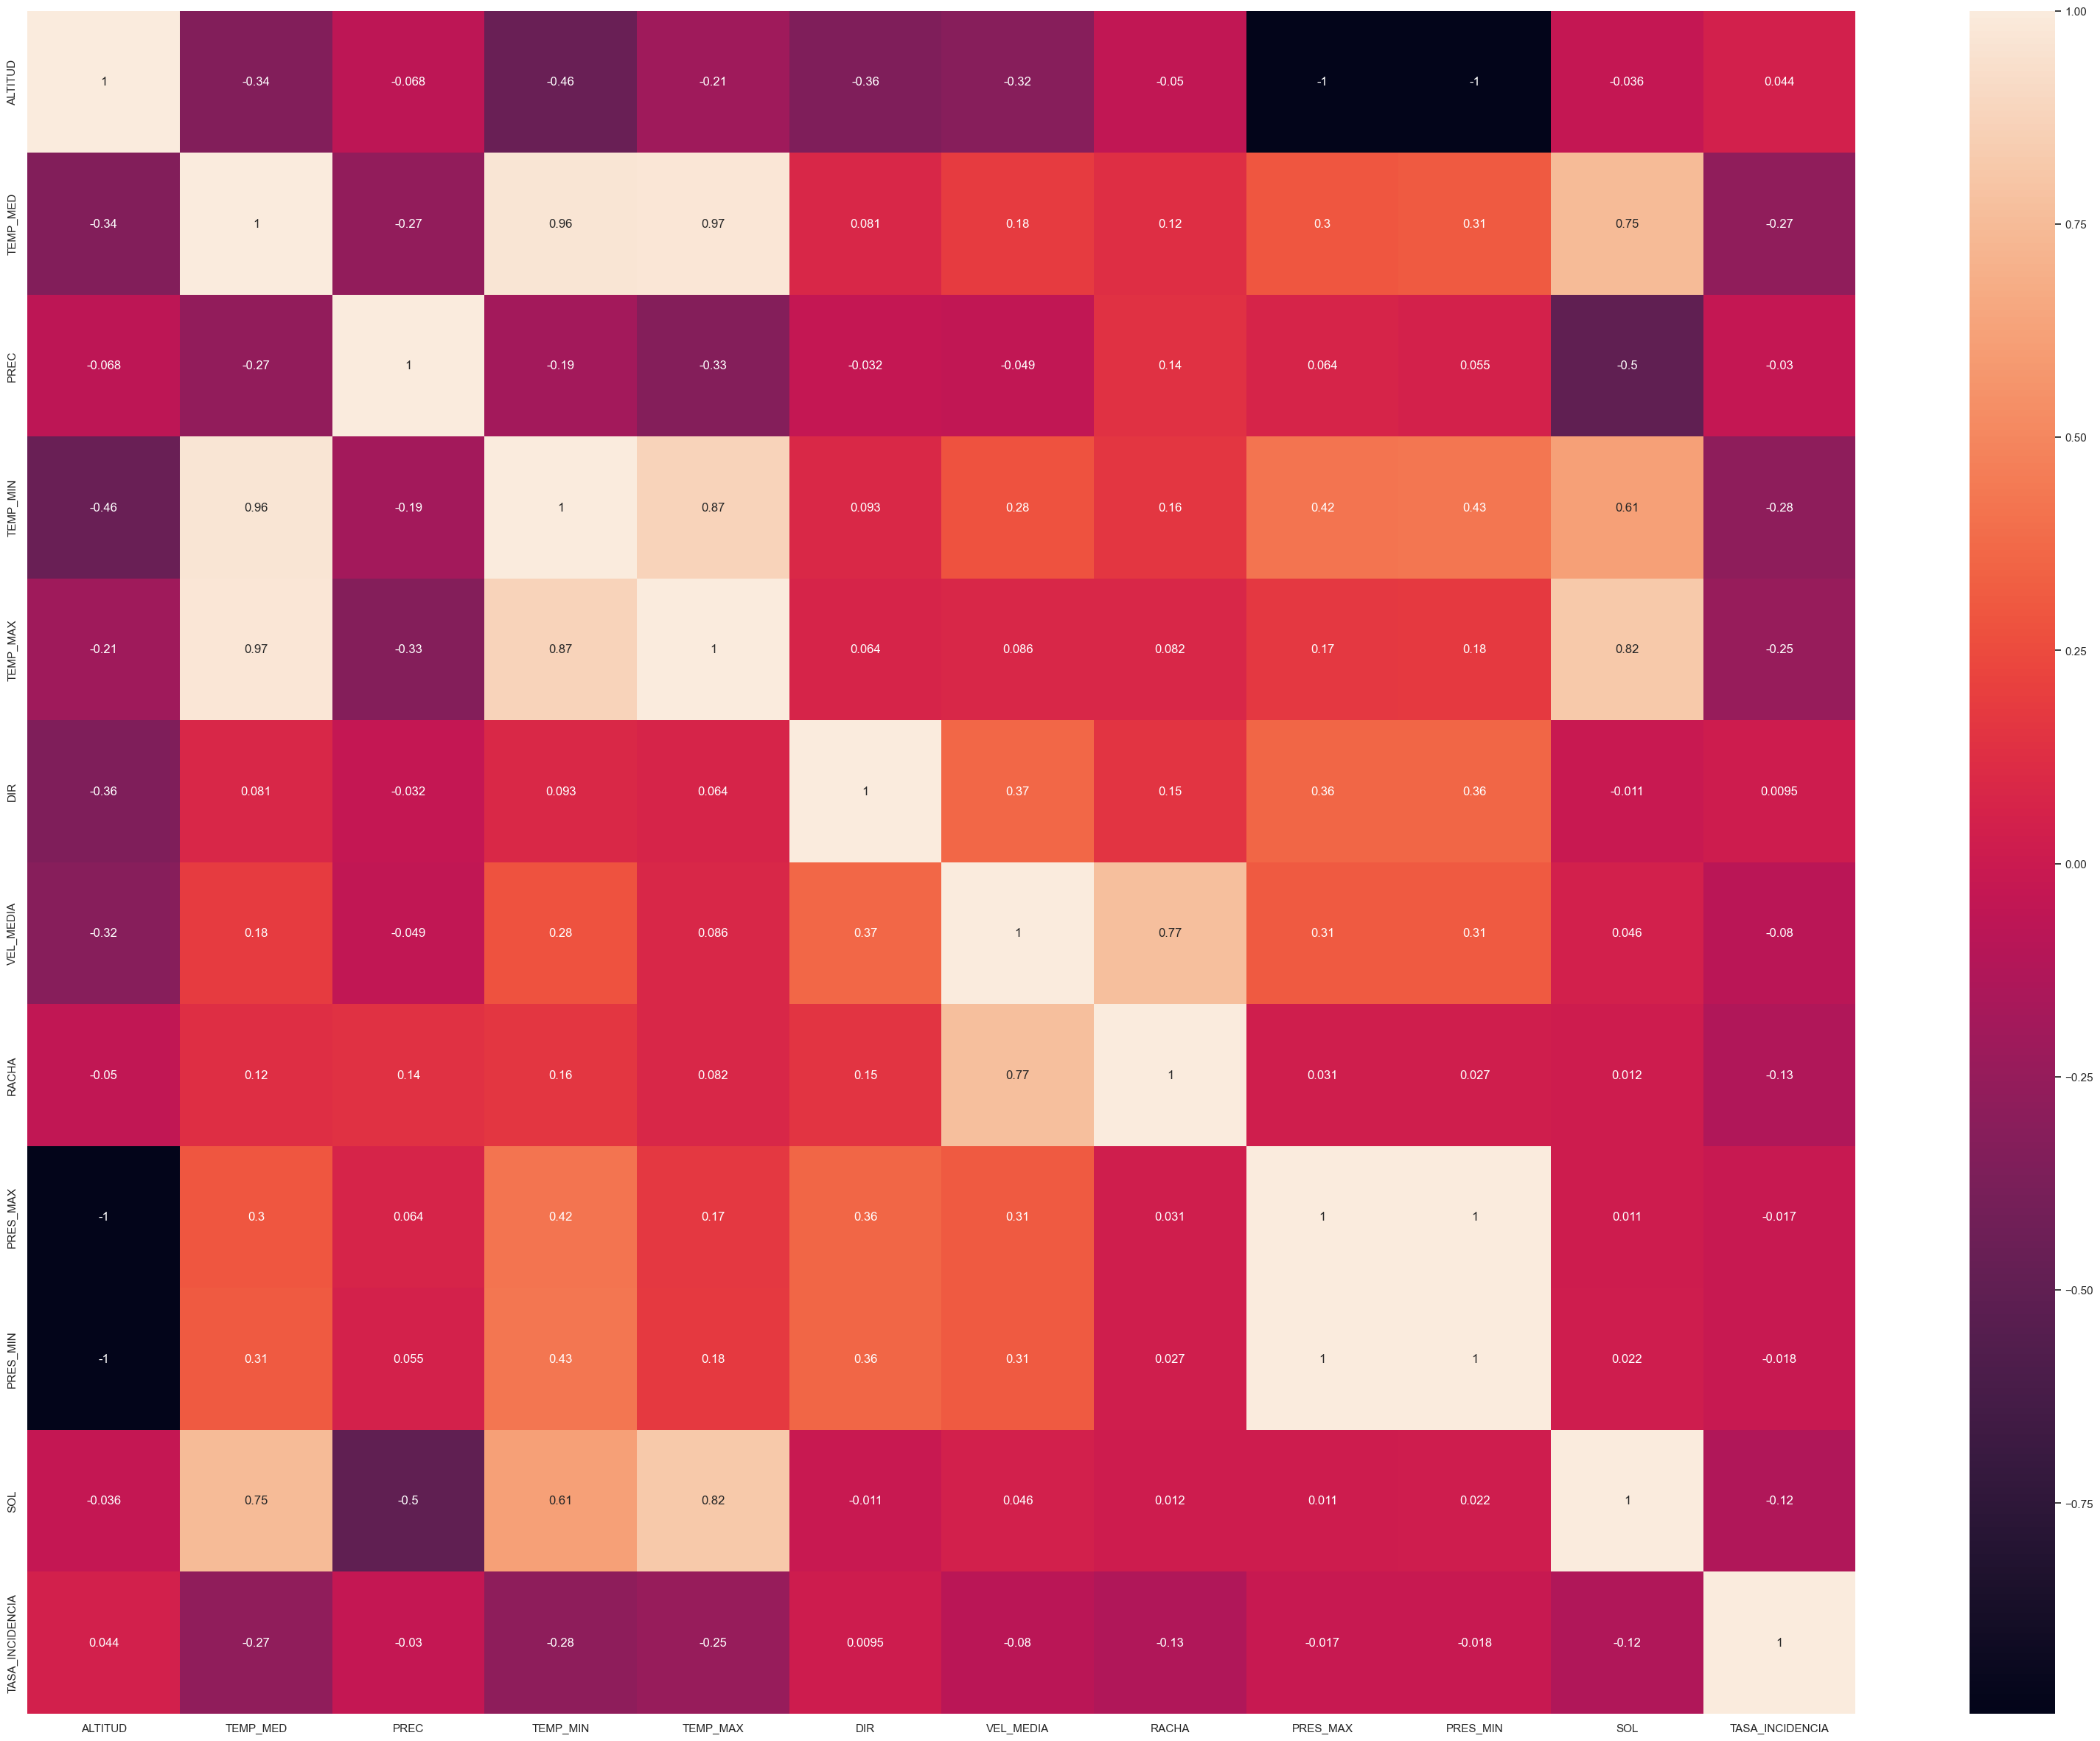

In [28]:
from matplotlib import figure
import seaborn as sns; sns.set()
corr = df.corr()
sns.heatmap(corr, annot=True)
sns.set(rc={'figure.figsize':(40, 30)})

In [29]:
df.shape

(1976, 14)

In [31]:
df = df.drop(columns=["TEMP_MIN", "TEMP_MAX", "PRES_MAX"])

In [32]:
df.to_csv('data_preprocess.csv', index=False)

# Caracterización de variable categorica Hash

### Ejemplo:

In [107]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Crear un dataframe con una variable categórica nominal con 100 valores únicos
df = pd.DataFrame({'ciudad': ['Ciudad1', 'Ciudad2', 'Ciudad3', 'Ciudad4', 'Ciudad5', 'Ciudad6', 
                              'Ciudad7', 'Ciudad8', 'Ciudad9', 'Ciudad10', 'Ciudad11', 'Ciudad12',
                              'Ciudad13', 'Ciudad14', 'Ciudad15', 'Ciudad16', 'Ciudad17', 'Ciudad18',
                              'Ciudad19', 'Ciudad20', 'Ciudad21', 'Ciudad22', 'Ciudad23', 'Ciudad24',
                              'Ciudad25', 'Ciudad26', 'Ciudad27', 'Ciudad28', 'Ciudad29', 'Ciudad30',
                              'Ciudad31', 'Ciudad32', 'Ciudad33', 'Ciudad34', 'Ciudad35', 'Ciudad36',
                              'Ciudad37', 'Ciudad38', 'Ciudad39', 'Ciudad40', 'Ciudad41', 'Ciudad42',
                              'Ciudad43', 'Ciudad44', 'Ciudad45', 'Ciudad46', 'Ciudad47', 'Ciudad48',
                              'Ciudad49', 'Ciudad50', 'Ciudad51', 'Ciudad52', 'Ciudad53', 'Ciudad54',
                              'Ciudad55', 'Ciudad56', 'Ciudad57', 'Ciudad58', 'Ciudad59', 'Ciudad60',
                              'Ciudad61', 'Ciudad62', 'Ciudad63', 'Ciudad64', 'Ciudad65', 'Ciudad66',
                              'Ciudad67', 'Ciudad68', 'Ciudad69', 'Ciudad70', 'Ciudad71', 'Ciudad72',
                              'Ciudad73', 'Ciudad74', 'Ciudad75', 'Ciudad76', 'Ciudad77', 'Ciudad78',
                              'Ciudad79', 'Ciudad80', 'Ciudad81', 'Ciudad82', 'Ciudad83', 'Ciudad84',
                              'Ciudad85', 'Ciudad86', 'Ciudad87', 'Ciudad88', 'Ciudad89', 'Ciudad90',
                              'Ciudad91', 'Ciudad92', 'Ciudad93', 'Ciudad94', 'Ciudad95', 'Ciudad96',
                              'Ciudad97', 'Ciudad98', 'Ciudad99', 'Ciudad100']})



In [98]:
df

,ciudad
0,Ciudad1
1,Ciudad2
2,Ciudad3
3,Ciudad4
4,Ciudad5
...,...
95,Ciudad96
96,Ciudad97
97,Ciudad98
98,Ciudad99


In [108]:
# Crear un objeto FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')

# Transformar la variable categórica utilizando la codificación Hashing
hashed = fh.transform(df['ciudad'])

# Convertir el resultado en un dataframe
hashed_df = pd.DataFrame(hashed.toarray())

# Unir el dataframe original con el dataframe de características codificadas
df = pd.concat([df, hashed_df], axis=1)

In [106]:
df

,ciudad,0,1,2
0,Ciudad1,-2.0,2.0,1.0
1,Ciudad2,-1.0,3.0,1.0
2,Ciudad3,-1.0,3.0,1.0
3,Ciudad4,-2.0,3.0,0.0
4,Ciudad5,-1.0,3.0,1.0
...,...,...,...,...
95,Ciudad96,-2.0,3.0,3.0
96,Ciudad97,-2.0,3.0,3.0
97,Ciudad98,-3.0,3.0,2.0
98,Ciudad99,-2.0,3.0,3.0


# Pruebas de Población

In [65]:
valor_inicial = float(input("Introduce el valor inicial: "))
valor_final = float(input("Introduce el valor final: "))
num_anios = int(input("Introduce el valor de años: "))

# Calculamos la tasa de crecimiento anual
tasa_crecimiento = ((valor_final / valor_inicial) ** (1 / num_anios) - 1) * 100

# Imprimimos la tasa de crecimiento anual
print("La tasa de crecimiento anual es del", round(tasa_crecimiento, 2), "%.")

Introduce el valor inicial: 358597
Introduce el valor final: 385727
Introduce el valor: 24
La tasa de crecimiento anual es del 0.3 %.


In [66]:
# Pedimos al usuario que introduzca la población actual y la tasa de crecimiento anual
poblacion_actual = int(input("Introduce la población actual: "))
tasa_crecimiento = float(input("Introduce la tasa de crecimiento anual en porcentaje: "))

# Convertimos la tasa de crecimiento a una fracción
tasa_crecimiento = tasa_crecimiento / 100

# Pedimos al usuario que introduzca el número de años para calcular la población futura
num_anios = int(input("Introduce el número de años: "))

# Calculamos la población futura
poblacion_futura = round(poblacion_actual * (1 + tasa_crecimiento) ** num_anios)

# Imprimimos la población futura
print("La población futura después de", num_anios, "años será de", poblacion_futura, "habitantes.")


Introduce la población actual: 385727
Introduce la tasa de crecimiento anual en porcentaje: 0.3
Introduce el número de años: 1
La población futura después de 1 años será de 386884 habitantes.


In [134]:
# Pedimos al usuario que introduzca la población inicial y final
poblacion_inicial = float(input("Introduce la población inicial: "))
poblacion_final = float(input("Introduce la población final: "))

# Pedimos al usuario que introduzca el número de años para calcular la tasa de crecimiento mensual
num_anios = int(input("Introduce el número de años: "))

# Calculamos la tasa de crecimiento anual
tasa_crecimiento_anual = ((poblacion_final / poblacion_inicial) ** (1 / num_anios) - 1)

# Calculamos la tasa de crecimiento mensual
tasa_crecimiento_mensual = (1 + tasa_crecimiento_anual) ** (1 / 12) - 1

# Imprimimos la tasa de crecimiento mensual
print("La tasa de crecimiento mensual es del", round(tasa_crecimiento_mensual * 100, 2), "%.")


Introduce la población inicial: 386464
Introduce la población final: 385727
Introduce el número de años: 1
La tasa de crecimiento mensual es del -0.02 %.


In [135]:
# Pedimos al usuario que introduzca la población actual y la tasa de crecimiento mensual
poblacion_actual = int(input("Introduce la población actual: "))
tasa_crecimiento_mensual = float(input("Introduce la tasa de crecimiento mensual en porcentaje: "))

# Convertimos la tasa de crecimiento a una fracción
tasa_crecimiento_mensual = tasa_crecimiento_mensual / 100

# Pedimos al usuario que introduzca el número de meses para calcular la población futura
num_meses = int(input("Introduce el número de meses: "))

# Calculamos la población futura
poblacion_futura = round(poblacion_actual * (1 + tasa_crecimiento_mensual) ** num_meses)

# Imprimimos la población futura
print("La población futura después de", num_meses, "meses será de", poblacion_futura, "habitantes.")


Introduce la población actual: 385727
Introduce la tasa de crecimiento mensual en porcentaje: -0.02
Introduce el número de meses: 1
La población futura después de 1 meses será de 385650 habitantes.


In [ ]:
#df[ ‘Result’ ] = df[ ‘Maths’ ].apply( lambda x: ‘Pass’ if x>=5 else ‘Fail’ )
#DF_PROV = DF_PROV.assign(POB_MEN = lambda x: (x["TOTAL_POB"] * (1 + x["TASA_MENSUAL"]) ** (x['FECHA'].astype(str).str.slice(start=5).astype(int))))

In [107]:
DF_PROV

,PROVINCIA,FECHA,POB_MEN
0,A CORUÑA,2020-01,1119584
1,A CORUÑA,2020-02,1119573
2,A CORUÑA,2020-03,1119561
3,A CORUÑA,2020-04,1119550
4,A CORUÑA,2020-05,1119538
...,...,...,...
1971,ZARAGOZA,2022-10,967938
1972,ZARAGOZA,2022-11,967986
1973,ZARAGOZA,2022-12,968035
1974,ZARAGOZA,2023-01,966487


In [436]:
df_no=pd.merge(df_prov_fec,df_pob,on=['PROVINCIA', 'YEAR'],how="outer",indicator=True)
df_no=df_no[df_no['_merge']=='left_only']

In [437]:
df_no

,PROVINCIA,FECHA,YEAR,TOTAL_POB,_merge
36,A CORUÑA,2023-01,2023,NaN,left_only
37,A CORUÑA,2023-02,2023,NaN,left_only
74,ALBACETE,2023-01,2023,NaN,left_only
75,ALBACETE,2023-02,2023,NaN,left_only
112,ALICANTE,2023-01,2023,NaN,left_only
...,...,...,...,...,...
1899,VALLADOLID,2023-02,2023,NaN,left_only
1936,ZAMORA,2023-01,2023,NaN,left_only
1937,ZAMORA,2023-02,2023,NaN,left_only
1974,ZARAGOZA,2023-01,2023,NaN,left_only
